In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('old_faithful.csv')

In [26]:
m = len(df)

In [3]:
df.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


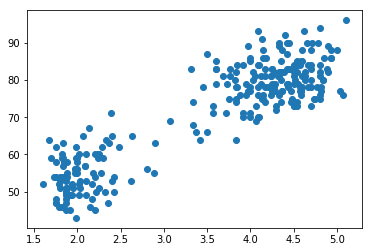

In [13]:
plt.scatter(df['eruptions '], df['waiting']); plt.show()

In [22]:
x = df.values

In [21]:
kmeans = KMeans(n_clusters=2)

In [23]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
labels = kmeans.predict(x)

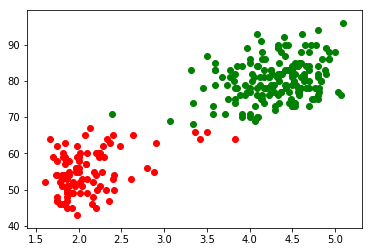

In [28]:
color = ['red', 'green']

for i in range(m):
    plt.scatter(df['eruptions '][i], df['waiting'][i], color=color[labels[i]])

plt.show()

In [35]:
df['class'] = labels

In [36]:
df.head()

,eruptions,waiting,class
0,3.600,79,1
1,1.800,54,0
2,3.333,74,1
3,2.283,62,0
4,4.533,85,1


In [37]:
t0 = df[df['class']==0]
t1 = df[df['class']==1]

In [152]:
t0 = t0.drop(['class'], axis=1)
t1 = t1.drop(['class'], axis=1)

In [156]:
mu0, mu1 = np.mean(t0, axis=0), np.mean(t1, axis=0)
s0, s1 = np.std(t0, axis=0), np.std(t1, axis=0)

In [153]:
t0

,eruptions,waiting
1,1.800,54
3,2.283,62
5,2.883,55
8,1.950,51
10,1.833,54
13,1.750,47
15,2.167,52
16,1.750,62
18,1.600,52
20,1.800,51


In [60]:
def gauss_pdf(x, mu, s):
    c = (np.sqrt(2 * np.pi) * s)**-1
    e = np.exp(-((x-mu)**2/(2*(s**2))))
    return np.log(c*e)

In [123]:
def prob1(x):
    x1, x2 = x
    p1, p2 = gauss_pdf(x1, mu1[0], s1[0]), gauss_pdf(x2, mu1[1], s1[1])
    prior = np.log(172./272)
    return p1 + p2 + prior
    
def prob0(x):
    x1, x2 = x
    p1, p2 = gauss_pdf(x1, mu0[0], s0[0]), gauss_pdf(x2, mu0[1], s0[1])
    prior = np.log(100./272)
    return p1 + p2 + prior

In [132]:
def pred(ip):
    f = int(prob0(ip) < prob1(ip))
    return f

In [133]:
x = [5, 90]

In [134]:
pred(x)

1

In [136]:
i = np.array([1, 2, 3])

In [146]:
np.matmul(i.reshape(3,1), i.reshape(1,3))

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [141]:
i.T.shape

(3,)

In [142]:
i.shape

(3,)

In [143]:
i.reshape(1,3)

array([[1, 2, 3]])

In [144]:
i.reshape(3,1)

array([[1],
       [2],
       [3]])

In [164]:

E0 = np.mean([np.matmul(i.reshape(-1, 1)-mu0.reshape(-1, 1), (i.reshape(1, -1)-mu0.reshape(1, -1)))
              for i in t0.values], axis=0)

E1 = np.mean([np.matmul(i.reshape(-1, 1)-mu1.reshape(-1, 1), (i.reshape(1, -1)-mu1.reshape(1, -1)))
              for i in t1.values], axis=0)


/Users/avinash/anaconda3/envs/datasci/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/avinash/anaconda3/envs/datasci/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [168]:
mu1

eruptions      4.297930
waiting       80.284884
dtype: float64

In [165]:
E0

array([[  0.1542787,   0.9856625],
       [  0.9856625,  34.4075   ]])

In [166]:
E1

array([[  0.17761717,   0.76310127],
       [  0.76310127,  31.48279475]])